In [13]:
import numpy as np
import qutip as qt

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.pyplot import cm
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from IPython.display import HTML

In [18]:
def visualize_atom(t, exp):
    omega = 0.5

    cart2th = lambda x, y : np.arctan2(y, x)
    cart2r = lambda x, y : np.sqrt(x**2 + y**2)

    E_th = lambda r, theta, tau : np.sin(theta) * np.exp(1j * r - 1j * omega * tau) * (1/r**3 - 1j/r**2 - 1/r)
    E_r = lambda r, theta, tau : np.cos(theta) * np.exp(1j * r - 1j * omega * tau) * (2/r**3 - 2j/r**2)
    def E_tot(x,y, tau):
        r = cart2r(x,y)
        theta = cart2th(x,y)
        field = np.real(E_r(r, theta, tau) + E_r(r, theta, tau))
        field[r<2.] = np.sign(field[r<2.])
        return field.transpose()

    N = 100
    d = 15
    x = np.linspace(-d, d, N)
    y = np.linspace(-d, d ,N)
    X, Y = np.meshgrid(x, y)


    fig, ax = plt.subplots()
    cax = ax.imshow(E_tot(X,Y, 100), cmap='RdBu_r', animated=True)
    plt.close()

    def update(frame):
        cax.set_array(E_tot(X, Y, frame) * exp[frame] / np.max(exp))  # Update the phase based on the frame
        return cax,

    ani = FuncAnimation(fig, update, frames=len(t), blit=True, interval=1000/20)  # 20 fps

    return ani

### Two atoms

$$
\begin{align}
H &= H_{\rm{atom1}} + H_{\rm{atom2}} + H_{\rm{coupling}} \\
H_{\rm{atom1}} &= \hbar \omega_0 \sigma_1^\dagger \sigma_1 \\
H_{\rm{atom2}} &= \hbar \omega_0 \sigma_2^\dagger \sigma_2 \\
H_{\rm{coupling}} &= \hbar J \left( \sigma_1^\dagger \sigma_2 + \sigma_1 \sigma_2^\dagger \right)
\end{align}
$$

10.0%. Run time:   9.93s. Est. time left: 00:00:01:29
20.0%. Run time:  10.38s. Est. time left: 00:00:00:41
30.0%. Run time:  10.77s. Est. time left: 00:00:00:25
40.0%. Run time:  11.10s. Est. time left: 00:00:00:16
50.0%. Run time:  11.42s. Est. time left: 00:00:00:11
60.0%. Run time:  11.75s. Est. time left: 00:00:00:07
70.0%. Run time:  12.04s. Est. time left: 00:00:00:05
80.0%. Run time:  12.38s. Est. time left: 00:00:00:03
90.0%. Run time:  12.70s. Est. time left: 00:00:00:01
100.0%. Run time:  12.98s. Est. time left: 00:00:00:00
Total run time:  13.09s


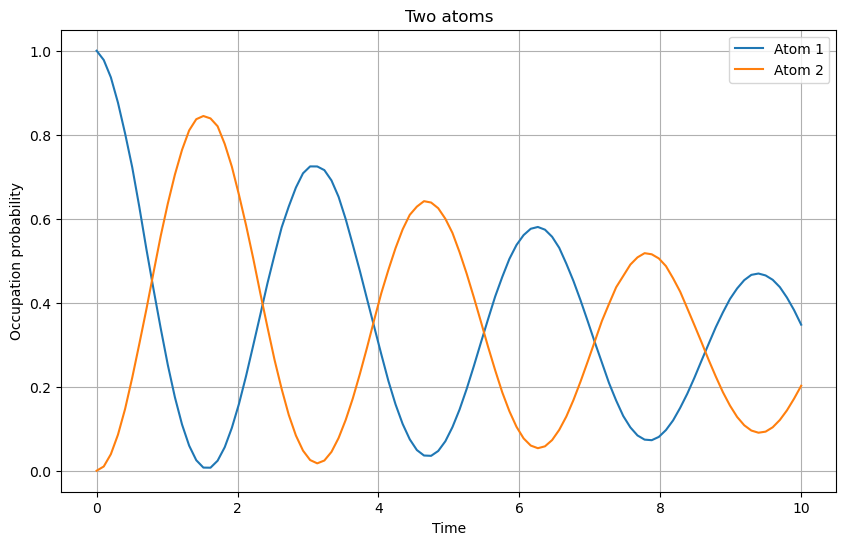

In [15]:
# Parameters
J = 1

# Operators
sm1 = qt.tensor(qt.sigmam(), qt.qeye(2))
sm2 = qt.tensor(qt.qeye(2), qt.sigmam())

# Hamiltonian
H_atom1 = sm1.dag() * sm1
H_atom2 = sm2.dag() * sm2
H_coupling = J * (sm1.dag() * sm2 + sm2.dag() * sm1)
H = H_atom1 + H_atom2 + H_coupling 

# Dissipation
gamma = 0.1
c_ops = [np.sqrt(gamma) * (sm1 + sm2)]

# Initial state
# Both in the excited state
psi0 = qt.tensor(qt.basis(2, 0), qt.basis(2, 1))

# Expectation values
e_ops = [sm1.dag() * sm1, sm2.dag() * sm2]

# Monte-Carlo time evolution
t = np.linspace(0, 10, 100)
result = qt.mcsolve(H, psi0, t, c_ops, e_ops)

# Plot the result
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, result.expect[0], label='Atom 1')
ax.plot(t, result.expect[1], label='Atom 2')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Two atoms')
ax.grid(True)

In [17]:
from matplotlib.animation import FuncAnimation, FFMpegWriter

In [26]:
animation = visualize_atom(t, result.expect[0])
HTML(animation.to_jshtml())